<a href="https://colab.research.google.com/github/ivosneto/Analise_Toys/blob/main/Analise_toys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Entendendo a base

Vamos começar importando as bibliotecas necessárias para nossa análise e tratamento dos dados. Usamos pandas para manipulação de dados, numpy para operações numéricas, seaborn e matplotlib.pyplot para visualização de dados com gráficos e datetime para lidar com datas

In [3]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

Importaremos a base de dados que iremos analisar. Estaremos utilizando os seguintes arquivos xlsx: Vendas_Global_Toys. Além disso, veremos as primeiras linhas para entender melhor suas estruturas e informações, além de verificar a quantidade de linhas e colunas para ter uma ideia de quantos registros estaremos lidando.

In [4]:
# Importando e verificando a base
df = pd.read_excel('Vendas_Global_Toys.xlsx')
df.head()

,ID Pedido,Data Pedido,Produto,Categoria,Região,Vendedor,Quantidade,Preço Unitário,Valor Total,Cliente,Notas,Unnamed: 11,Unnamed: 12
0,1001,01/15/2024,Carrinho Rápido XL,Veículos,Sudeste,João Silva,2,25.0,50.0,51,0,Loja Brinque Mais,NaN
1,1002,2024-01-16 00:00:00,Boneca Sonho Mágico,Bonecas,NaN,Maria Costa,1,75.0,0.0,75,0,Super Kids SP,Pedido Urgente
2,1003,2024-01-17 00:00:00,Blocos Criativos 100pçs,Construção,Sul,Pedro Alves,3,50.0,0.0,150,0,Cia do Brinquedo,NaN
3,1004,2024-01-18 00:00:00,Carrinho Rápido XL,Veículos,Sudeste,João Silva,-1,25.0,50.0,25,50,Loja Brinque Mais,Erro na quantidade
4,1005,19.01.2024,Jogo da Memória Kids,Jogos,Nordeste,Ana Pereira,5,30.0,0.0,150,0,Infância Feliz,NaN


In [5]:
# Verificando tamanho
df.shape

(301, 13)

🧹 Problemas detectados na base:

📅 Datas

Formatos diferentes: 01/15/2024, 2024-01-16, 19.01.2024.

Algumas células com data ausente.


🔤 Inconsistência nos nomes

Produto: "Carrinho Rápido XL" vs "Carrinho Rápido xl"

Região: "SUL" (maiúsculo) vs "Sul"

Possíveis variações em Categoria e Vendedor também.


❌ Dados ausentes ou inválidos

Região e Data ausentes.

Quantidades negativas (ex: -1).

Preços como texto ou nulos.

Valores Totais incorretos (ex: total = 0 apesar de haver preço e quantidade).

📄 Problemas estruturais

Colunas irrelevantes: Notas, Unnamed: 11, Unnamed: 12.

Duplicatas: Exemplo claro do pedido 1001 duplicado.

Campo Cliente parece representar valor (possivelmente erro de nome da coluna).



##Limpar e tratar os dados

Vamos agora limpar e tratar os dados em Python para gerar a base final tratada. As etapas incluirão:

--Normalização de datas.

Correção de capitalização de texto.

-Remoção de duplicatas.

-Conversão e correção de quantidade/preço/valores.

-Remoção de linhas inválidas (quantidade negativa, dados nulos essenciais).

-Cálculo correto do Valor Total, se necessário.

In [6]:
# Padronizar nomes de colunas
df.columns = [col.strip() for col in df.columns]

In [7]:
# 1. Normalizar datas (tentar converter para datetime, forçar erros para NaT)
df['Data Pedido'] = pd.to_datetime(df['Data Pedido'], errors='coerce', dayfirst=True)
df['Data Pedido'].head()

<ipython-input-7-f6c9e54c0c3a>:2: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Data Pedido'] = pd.to_datetime(df['Data Pedido'], errors='coerce', dayfirst=True)


,Data Pedido
0,2024-01-15
1,2024-01-16
2,2024-01-17
3,2024-01-18
4,NaT


In [8]:
# 2. Corrigir capitalização (padronizar como título)
df["Produto"] = df["Produto"].str.title().str.strip()
df["Categoria"] = df["Categoria"].str.title().str.strip()
df["Região"] = df["Região"].str.title().str.strip()
df["Vendedor"] = df["Vendedor"].str.title().str.strip()

In [9]:
# 3. Corrigir tipos: remover espaços e converter preços/quantidade
df["Quantidade"] = pd.to_numeric(df["Quantidade"], errors='coerce')
df["Preço Unitário"] = pd.to_numeric(df["Preço Unitário"], errors='coerce')

In [10]:
# 4. Calcular Valor Total corretamente
df["Valor Total"] = df["Quantidade"] * df["Preço Unitário"]

In [11]:
# 5. Remover linhas com dados essenciais ausentes ou inválidos
df_clean = df.dropna(subset=["ID Pedido", "Data Pedido", "Produto", "Categoria", "Região", "Vendedor", "Quantidade", "Preço Unitário"])
df_clean = df_clean[df_clean["Quantidade"] > 0]

# 6. Remover colunas irrelevantes
irrelevant_cols = ["Notas", "Unnamed: 11", "Unnamed: 12", "Cliente"]
df_clean.drop(columns=[col for col in irrelevant_cols if col in df_clean.columns], inplace=True)

# 7. Remover duplicatas exatas
df_clean = df_clean.drop_duplicates()

df_clean.reset_index(drop=True, inplace=True)

df_clean.head(10)

,ID Pedido,Data Pedido,Produto,Categoria,Região,Vendedor,Quantidade,Preço Unitário,Valor Total
0,1001,2024-01-15,Carrinho Rápido Xl,Veículos,Sudeste,João Silva,2.0,25.0,50.0
1,1003,2024-01-17,Blocos Criativos 100Pçs,Construção,Sul,Pedro Alves,3.0,50.0,150.0
2,1006,2024-01-20,Urso De Pelúcia Grande,Pelúcias,Sul,Pedro Alves,1.0,120.0,120.0
3,1007,2024-01-21,Boneca Sonho Mágico,Bonecas,Sudeste,Maria Costa,2.0,75.0,150.0
4,1008,2024-01-22,Carrinho Rápido Xl,Veículos,Nordeste,Ana Pereira,3.0,25.0,75.0
5,1010,2024-01-24,Quebra-Cabeça 500Pçs,Jogos,Centro-Oeste,Carlos Lima,2.0,45.0,90.0
6,1011,2024-01-25,Mini Cozinha Infantil,Faz De Conta,Sudeste,Maria Costa,1.0,180.0,180.0
7,1012,2024-01-26,Carro Rápido Xl,Veículos,Sul,Pedro Alves,4.0,25.0,100.0
8,1014,2024-01-28,Urso De Pelúcia Grande,Pelúcias,Nordeste,Ana Pereira,2.0,120.0,240.0
9,1015,2024-01-29,Jogo Da Memória Kids,Jogos,Centro-Oeste,Carlos Lima,3.0,30.0,90.0


##Analises

KPIs principais

In [12]:
# Faturamento Total
faturamento_total = df["Valor Total"].sum()
quantidade_total = df["Quantidade"].sum()
faturamento_medio_pedido = df.groupby("ID Pedido")["Valor Total"].sum().mean()

print(f"Faturamento Total: R$ {faturamento_total:,.2f}")
print(f"Quantidade Total Vendida: {quantidade_total}")
print(f"Faturamento Médio por Pedido: R$ {faturamento_medio_pedido:,.2f}")

Faturamento Total: R$ 62,410.00
Quantidade Total Vendida: 1110.0
Faturamento Médio por Pedido: R$ 208.03


Top categorias e produtos

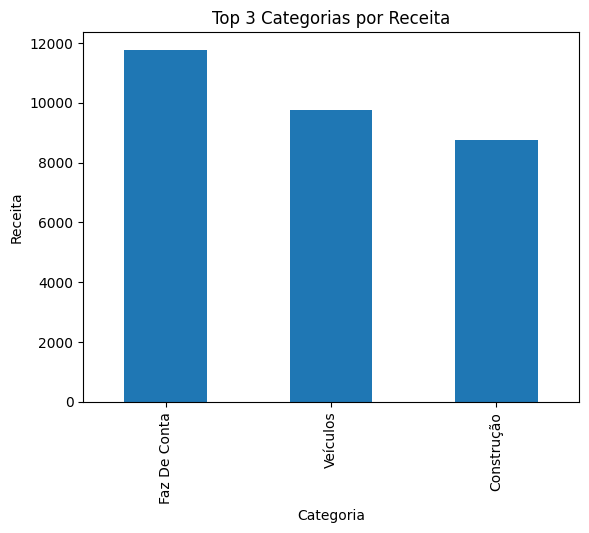

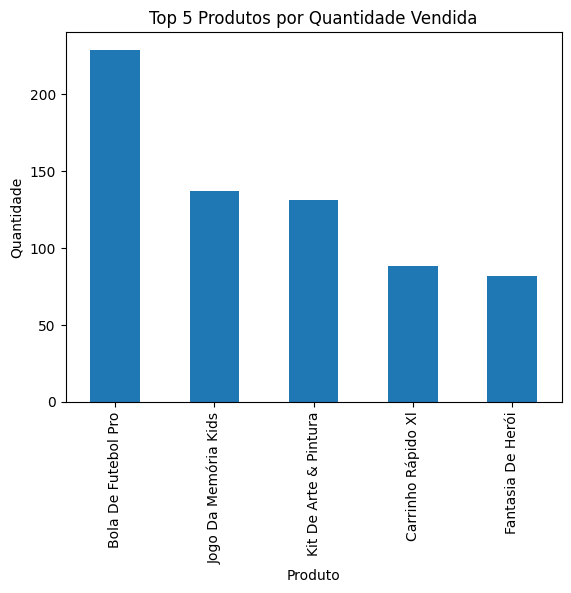

In [13]:
# Top 3 Categorias por Receita
top_categorias = df.groupby("Categoria")["Valor Total"].sum().sort_values(ascending=False).head(3)
top_categorias.plot(kind="bar", title="Top 3 Categorias por Receita", ylabel="Receita", xlabel="Categoria")
plt.show()

# Top 5 Produtos mais vendidos por Quantidade
top_produtos = df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False).head(5)
top_produtos.plot(kind="bar", title="Top 5 Produtos por Quantidade Vendida", ylabel="Quantidade")
plt.show()

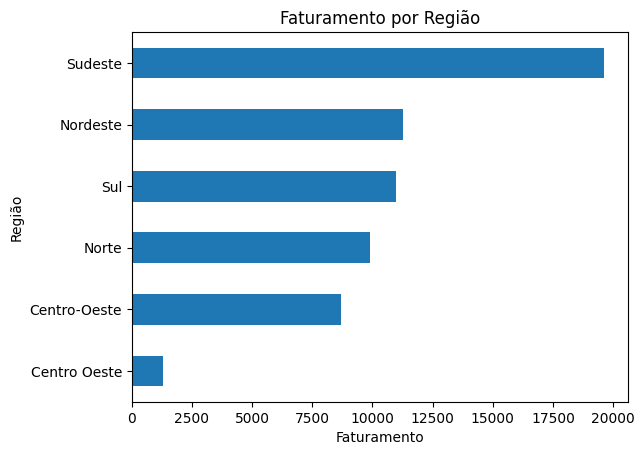

In [14]:
vendas_regiao = df.groupby("Região")["Valor Total"].sum().sort_values()
vendas_regiao.plot(kind="barh", title="Faturamento por Região", xlabel="Faturamento")
plt.show()

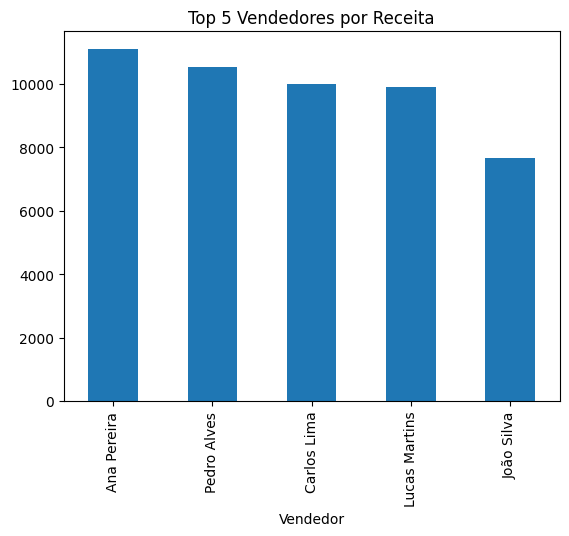

In [15]:
vendedores_top = df.groupby("Vendedor")["Valor Total"].sum().sort_values(ascending=False).head(5)
vendedores_top.plot(kind="bar", title="Top 5 Vendedores por Receita")
plt.show()

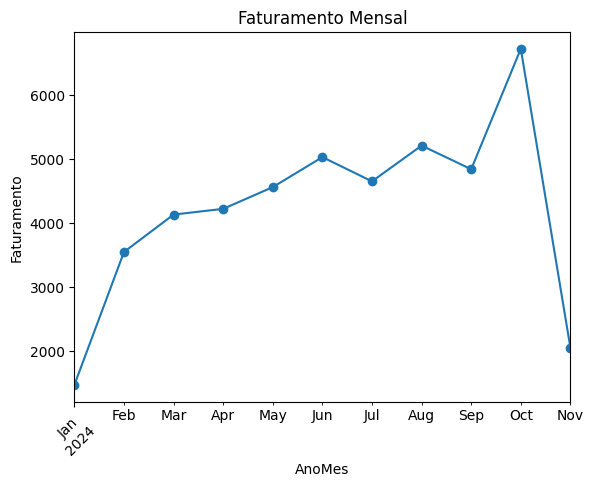

In [16]:
df["AnoMes"] = df["Data Pedido"].dt.to_period("M")
mensal = df.groupby("AnoMes")["Valor Total"].sum()
mensal.plot(marker='o', title="Faturamento Mensal")
plt.xticks(rotation=45)
plt.ylabel("Faturamento")
plt.show()

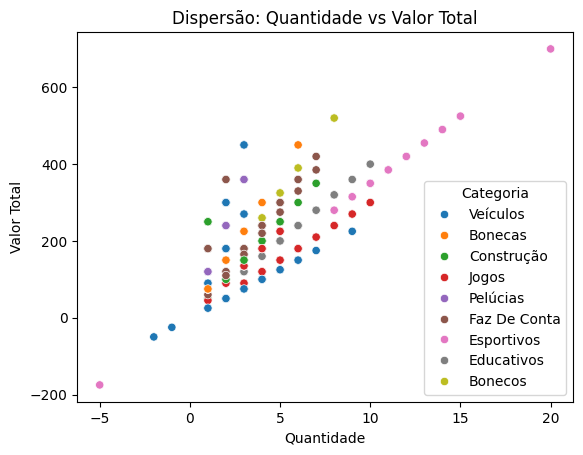

In [17]:
sns.scatterplot(data=df, x="Quantidade", y="Valor Total", hue="Categoria")
plt.title("Dispersão: Quantidade vs Valor Total")
plt.show()

In [18]:
# Salva o DataFrame df_clean em um arquivo CSV
df_clean.to_csv('Vendas_Global_Toys_tratada.csv', index=False)